In [1]:
#Pyber - Final
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
city = "city_data.csv"
ride = "ride_data.csv"

city_data = pd.read_csv(city, low_memory = False)
ride_data = pd.read_csv(ride,  low_memory = False)

city_data.head()
ride_data.head()
city_ride_data = pd.merge(ride_data, city_data, how='left', on=['city', 'city'])
#city_ride_data.head()

In [3]:
city_ride_data = pd.merge(ride_data, city_data, how='left', on=['city', 'city'])
#city_ride_data.head()

In [4]:
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
#urban_cities.head()

In [5]:
suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
#suburban_cities.head()

In [6]:
rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]
#rural_cities.head()

In [7]:
urban_group = urban_cities.groupby("city")
#urban_group.head()

In [8]:
urban_average_fare = urban_group["fare"].mean()
#urban_average_fare

In [9]:
urban_rides_count = urban_group["ride_id"].count()
#urban_rides_count

In [10]:
urban_driver_count = urban_group["driver_count"].mean()
#urban_driver_count

In [11]:
suburban_group = suburban_cities.groupby("city")
#suburban_group.head()

suburban_average_fare = suburban_group["fare"].mean()
#suburban_average_fare

suburban_rides_count = suburban_group["ride_id"].count()
#suburban_rides_count

suburban_driver_count = suburban_group["driver_count"].mean()
#suburban_driver_count

In [12]:
rural_group = rural_cities.groupby("city")
#rural_group.head()

rural_average_fare = rural_group["fare"].mean()
#rural_average_fare

rural_rides_count = rural_group["ride_id"].count()
#rural_rides_count

rural_driver_count = rural_group["driver_count"].mean()
#rural_driver_count

In [13]:
sns.set()
plt.grid(True)

plt.scatter(x=urban_rides_count,
           y=urban_average_fare,
           s=4*urban_driver_count,
           marker='o', facecolors='lightcoral', edgecolors="black",
           alpha=0.9, label="urban")
plt.scatter(x=suburban_rides_count,
           y=suburban_average_fare,
           s=4*suburban_driver_count,
           marker='o', facecolors='gold', edgecolors="black",
           alpha=0.9, label="suburban")
plt.scatter(x=rural_rides_count,
           y=rural_average_fare,
           s=4*rural_driver_count,
           marker='o', facecolors='lightskyblue', edgecolors="black",
           alpha=0.9,label="rural")
# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                numpoints=1, scatterpoints=1,
                loc="best", title="City Types",
                labelspacing=0.5)
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per city")
plt.ylabel("Average Fare ($) per city")
plt.xlim(0,40)
plt.ylim(15,60)
plt.text(1, 0.5, "Note:\nCircle size correlates with driver count per city", fontsize=14, transform=plt.gcf().transFigure)

Text(1,0.5,'Note:\nCircle size correlates with driver count per city')

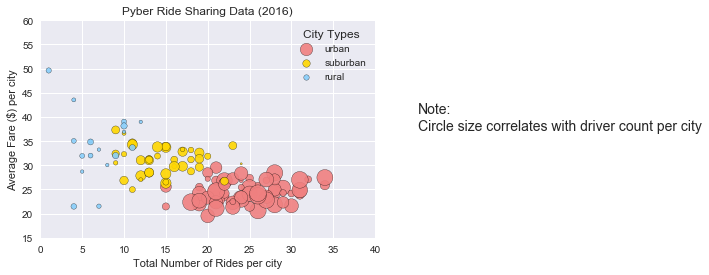

In [14]:
plt.show()

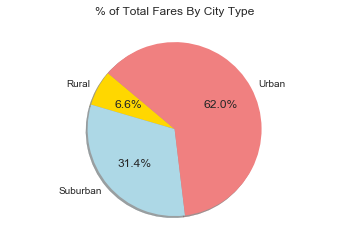

In [15]:
# % of Total fares by City Type
colors = ["gold", "lightblue", "lightcoral"]
tot_fares_by_city_type_group = pd.DataFrame(city_ride_data.groupby(['city','type'])['fare'].sum())
tot_fares_by_city_type_summary = tot_fares_by_city_type_group.reset_index()
tot_fares_by_city_type_summary.head()
tot_fares_by_city_type_group = pd.DataFrame(tot_fares_by_city_type_summary.groupby(['type'])['fare'].sum())
tot_fares_by_city_type = tot_fares_by_city_type_group.reset_index()
explode = (0, 0, 0)
plt.axis("equal")
plt.title("% of Total Fares By City Type")
plt.pie(tot_fares_by_city_type['fare'],explode=explode, labels = tot_fares_by_city_type['type'],colors = colors, autopct = '%1.1f%%',shadow=True, startangle=140)
plt.show()

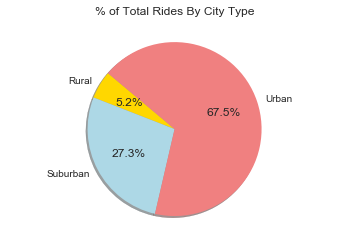

In [16]:
# % of Total rides by City Type
colors = ["gold", "lightblue", "lightcoral"]
tot_rides_by_city_type_group = pd.DataFrame(city_ride_data.groupby(['city','type'])['ride_id'].count())
tot_rides_by_city_type_summary = tot_rides_by_city_type_group.reset_index()
tot_rides_by_city_type_summary.head()
tot_rides_by_city_type_group = pd.DataFrame(tot_rides_by_city_type_summary.groupby(['type'])['ride_id'].sum())
tot_rides_by_city_type = tot_rides_by_city_type_group.reset_index()
explode = (0, 0, 0)
plt.axis("equal")
plt.title("% of Total Rides By City Type")
plt.pie(tot_rides_by_city_type['ride_id'],explode=explode, labels = tot_fares_by_city_type['type'],colors = colors, autopct = '%1.1f%%',shadow=True, startangle=140)
plt.show()

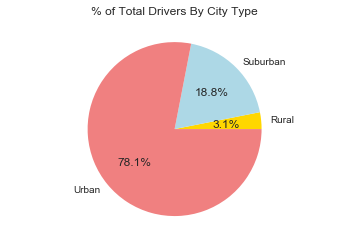

In [17]:
#Total Drivers By City Type
colors = ["gold", "lightblue", "lightcoral"]
tot_drivers_by_city_type_group = pd.DataFrame(city_ride_data.groupby(['city','type'])['driver_count'].mean())
tot_drivers_by_city_type_summary = tot_drivers_by_city_type_group.reset_index()
tot_drivers_by_city_type_summary.head()
tot_drivers_by_type_group = pd.DataFrame(tot_drivers_by_city_type_summary.groupby(['type'])['driver_count'].sum())
tot_drivers_by_city_type = tot_drivers_by_type_group.reset_index()
tot_drivers_by_city_type
explode = (0, 0, 0)
plt.axis("equal")
plt.title("% of Total Drivers By City Type")
plt.pie(tot_drivers_by_city_type['driver_count'],labels = tot_drivers_by_city_type['type'],colors = colors, autopct = '%1.1f%%')
plt.show()

In [18]:
print("Analysis")
print("Observed Trend 1: average fares are lower in urban areas.")
print("Observed Trend 2: number of rides are higher in urban areas.")
print("Observed Trend 3: number of drivers are higher in urban areas.")

Analysis
Observed Trend 1: average fares are lower in urban areas.
Observed Trend 2: number of rides are higher in urban areas.
Observed Trend 3: number of drivers are higher in urban areas.
